In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.ticker as ticker

데이터 유통과 보유 현황으로 알아보는 데이터 산업 동향 분석

In [2]:
#1 데이터 산업(비중 증가 배경 시사)

data=pd.read_csv("데이터 보유 현황/데이터_보유_여부.csv")
method=pd.read_csv("데이터 보유 현황/데이터_수집_방법별_비중.csv")

In [3]:
method

,수집방법별(1),2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,수집방법별(1),응답수 (개),비중 (%),응답수 (개),비중 (%),응답수 (개),비중 (%),응답수 (개),비중 (%),응답수 (개),비중 (%)
1,전체,254,-,199,-,298,-,373,-,2614,-
2,자사의 데이터 가공(데이터화)에 의한 데이터 확보,121,47.6,71,35.9,54,18.1,50,13.3,499,19.1
3,마케팅 등 고객 커뮤니케이션을 통한 데이터 수집,15,5.9,32,16.1,49,16.4,46,12.4,322,12.3
4,"데이터 거래를 통한 데이터 수집(플랫폼, 판매사 등)",72,28.3,26,12.9,21,6.9,22,5.9,86,3.3
5,온라인 회원 및 고객이 이용 동의한 데이터 수집,164,64.6,23,11.5,63,21.1,93,24.9,965,36.9
6,공공기관에서 제공되는 데이터 수집,122,48,16,7.9,21,6.9,41,10.9,295,11.3
7,수집솔루션(tool) 등에 의한 웹데이터 수집,27,10.6,14,6.8,32,10.7,24,6.5,162,6.2
8,소셜미디어(SNS)·인터넷 등을 통한 데이터 수집,65,25.6,10,5.1,41,13.6,69,18.6,84,3.2
9,내방객 등 오프라인을 통한 데이터 수집,6,2.4,2,0.8,3,1.1,13,3.5,149,5.7


In [4]:
data

,보유여부별(1),2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,보유여부별(1),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%),응답기업수 (개),비중 (%)
1,전체,357,-,357,-,464,-,478,-,3044,-
2,보유,254,71.1,199,55.7,298,64.2,373,78,2614,85.9
3,미보유,103,28.9,158,44.3,166,35.8,105,22,430,14.1


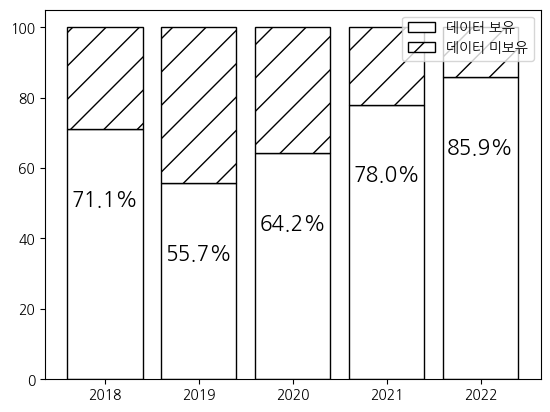

In [5]:
# 데이터 보유 현황 barh그래프로 나타내기
dataset = data.drop(axis=0, index=[0,1]).iloc[:,2::2]
x=dataset.columns.to_list()

color_list=['b','g','r','k','y']
A=list(map(float,dataset.T[2].values))
B=list(map(float,dataset.T[3].values))
X = range(5)

plt.bar(X,A,color='w',edgecolor='k' ,label='데이터 보유')
plt.bar(X,B,color='w', bottom=A, hatch="/", edgecolor='k', label="데이터 미보유")
plt.xticks(X,[i for i in range(2018,2023)])

for i in range(5) :
    plt.text(i, A[i]-20, f"{A[i]}%", fontsize=15, color='k',va="center", ha="center")



plt.legend()

plt.show()
# 오픈소스로의 이동 가속화 : https://www.dailysecu.com/news/articleView.html?idxno=152884
# 인공지능과 머신러닝 기술의 도입 확대, 클라우드 데이터베이스의 부상, 오픈소스 DBMS의 증가
# 빅데이터를 활용한 신생 기업 대거 등장 : https://www.globale.co.kr/news/articleView.html?idxno=21909
# IoT, 클라우드, 빅데이터, AI 이용 사업체 5년새 급증 : https://www.asiatoday.co.kr/view.php?key=20200121010011763

In [6]:
method=method.iloc[:,::2].drop(axis=0, index=[0,1]).replace("-",0)
method["2018.1"]=method["2018.1"].astype("float64")
method["2018.1"]=method["2018.1"]/2.515
method["2019.1"]=method["2019.1"].astype("float64")
method["2020.1"]=method["2020.1"].astype("float64")
method["2021.1"]=method["2021.1"].astype("float64")
method["2022.1"]=method["2022.1"].astype("float64")
method=method.reset_index(drop=True)
method=method
method

,수집방법별(1),2018.1,2019.1,2020.1,2021.1,2022.1
0,자사의 데이터 가공(데이터화)에 의한 데이터 확보,18.926441,35.9,18.1,13.3,19.1
1,마케팅 등 고객 커뮤니케이션을 통한 데이터 수집,2.345924,16.1,16.4,12.4,12.3
2,"데이터 거래를 통한 데이터 수집(플랫폼, 판매사 등)",11.252485,12.9,6.9,5.9,3.3
3,온라인 회원 및 고객이 이용 동의한 데이터 수집,25.685885,11.5,21.1,24.9,36.9
4,공공기관에서 제공되는 데이터 수집,19.085487,7.9,6.9,10.9,11.3
5,수집솔루션(tool) 등에 의한 웹데이터 수집,4.214712,6.8,10.7,6.5,6.2
6,소셜미디어(SNS)·인터넷 등을 통한 데이터 수집,10.178926,5.1,13.6,18.6,3.2
7,내방객 등 오프라인을 통한 데이터 수집,0.954274,0.8,1.1,3.5,5.7
8,각종 센서·설비 등을 통해 자동 데이터 수집,1.709742,0.8,5.2,4.0,2.0
9,기타,0.954274,0.6,0.0,0.0,0.0


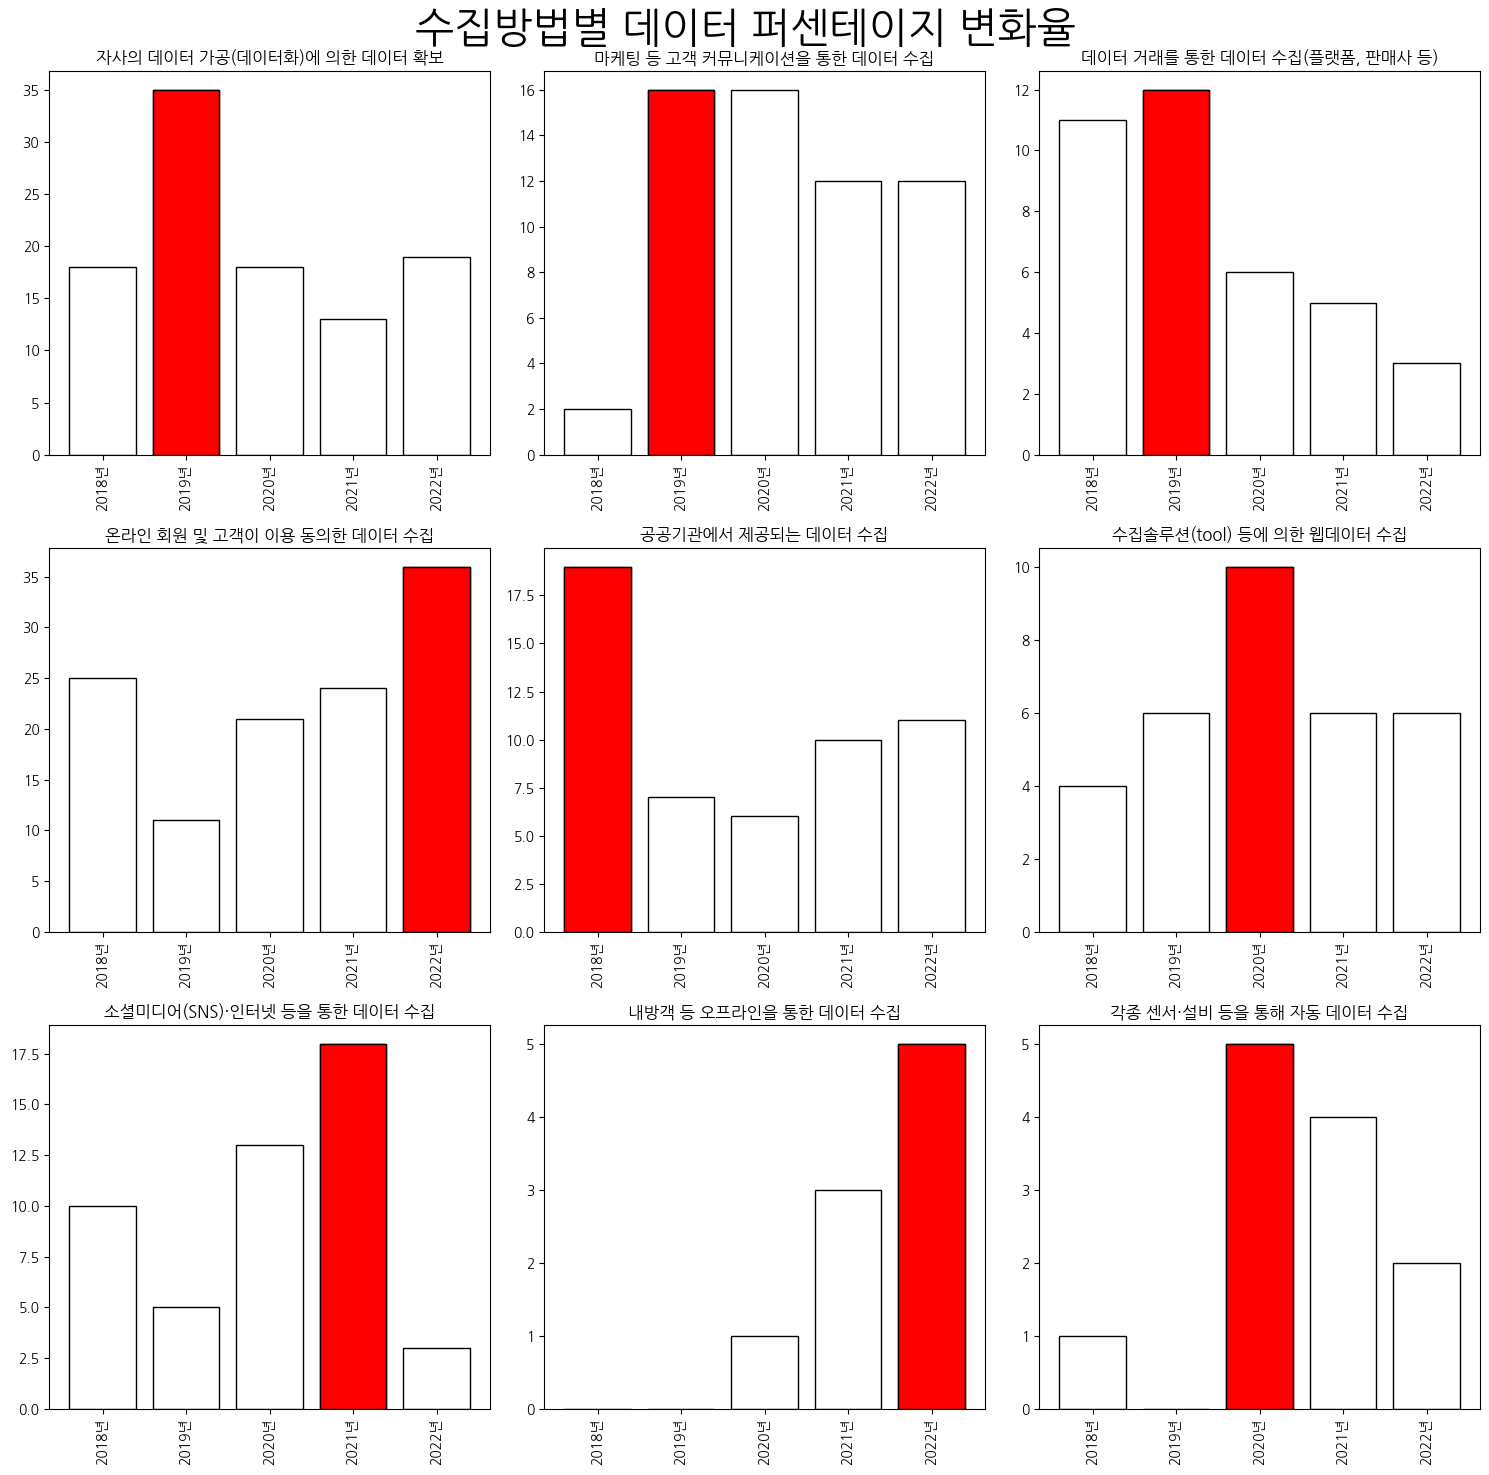

In [7]:
grid_size=(3,3)
plt.figure(figsize=(15, 15))

for i in range(0,method.shape[0]-2) : 
    y=list(map(int,method.iloc[i, 1:].values))
    max_value_index=y.index(max(y))
    plt.subplot2grid(grid_size,(int(i/3),i%3), rowspan=1,colspan=1)
    plt.bar(method.columns[1:],y,color='w',edgecolor='k')
    plt.bar(max_value_index,max(y),color='r',edgecolor='k')
    plt.title(method.iloc[i,0])
    plt.xticks(range(5), [f'{i}년' for i in range(2018,2023)],rotation=90)
    
plt.suptitle("수집방법별 데이터 퍼센테이지 변화율", size=30)
plt.tight_layout()
plt.show()

# 시대에 따른 데이터 수집 방법(수집솔루션(tool)등에 의한 웹데이터 수집) : https://www.junggi.co.kr/article/articleView.html?no=31694
# 내방객 등 오프라인을 통한 데이터 수집(중요) : https://weekly.donga.com/economy/article/all/11/3784597/1
# 공공데이터 스타트업 증가(공공기관에서 제공되는 데이터 수집) : https://ditoday.com/%ea%b3%b5%ea%b3%b5-%eb%8d%b0%ec%9d%b4%ed%84%b0%eb%a1%9c-%eb%8f%88-%eb%b2%84%eb%8a%94-%ec%8a%a4%ed%83%80%ed%8a%b8%ec%97%85-4%ec%84%a0/
# 공공데이터 확대 : https://www.etnews.com/20240129000202


In [8]:
size

NameError: name 'size' is not defined

In [ ]:
#https://www.kdata.or.kr/kr/board/info_01/boardView.do?pageIndex=1&bbsIdx=33253&searchCondition=all&searchKeyword=%EC%82%B0%EC%97%85
# 데이터_산업_증감.csv